In [101]:
# This Python 3 environment comes with many helpful analytics libraries installed
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt

%matplotlib inline  # To display plots inline in Jupyter Notebook

# Check file paths in the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

UsageError: unrecognized arguments: # To display plots inline in Jupyter Notebook


In [ ]:
# Load dataset
base = pd.read_csv("/kaggle/input/titanic/train.csv")

In [102]:
# Basic inspection
base.shape
base.head()
base.dtypes
base.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0, 0.5, 'Dead OR Alive')

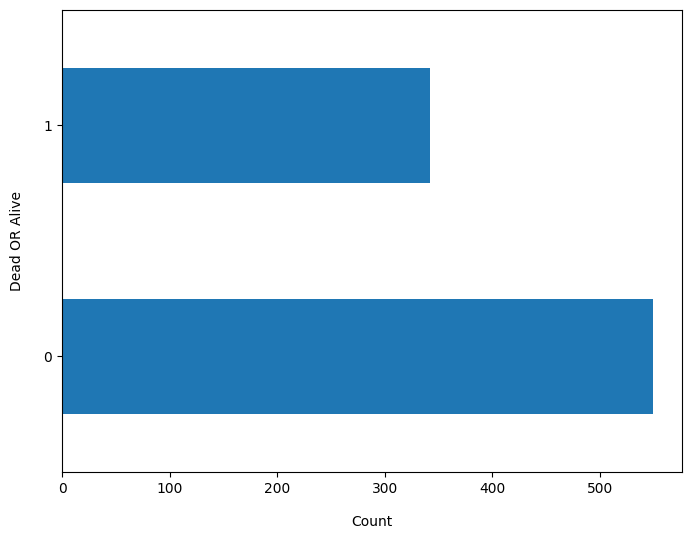

In [103]:
# Plot survival distribution
base['Survived'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Dead OR Alive", labelpad=14)

In [104]:
c = base['Survived'].value_counts()
print(c)
(c/891)*100  # % of survived and not survived

Survived
0    549
1    342
Name: count, dtype: int64


Survived
0    61.616162
1    38.383838
Name: count, dtype: float64

In [105]:
# Check null values
base.info(verbose=True)
(base.isnull().sum()/891)*100  # % missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

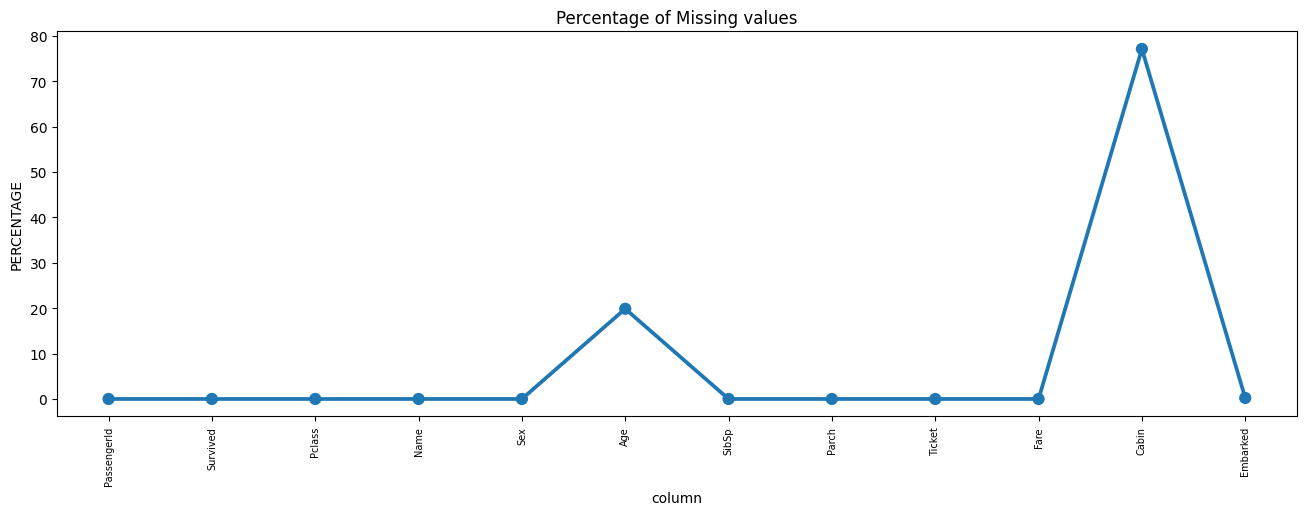

In [106]:
# Visualize missing data
missing = pd.DataFrame((base.isnull().sum())*100/base.shape[0]).reset_index()
missing.columns = ['column', 'missing_percent']
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='column', y='missing_percent', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [107]:
# Copy base to basen for further processing
basen = base.copy()

In [108]:
# Fill missing values in Embarked with mode
basen['Embarked'] = basen['Embarked'].fillna(base['Embarked'].mode()[0])
basen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


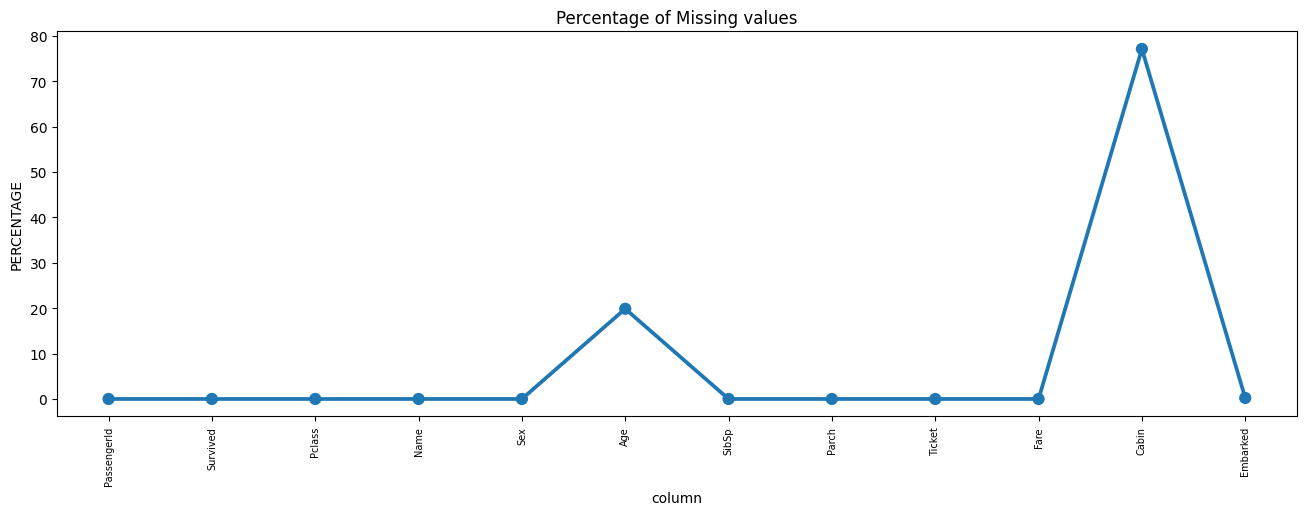

In [109]:
missing= pd.DataFrame((base.isnull().sum())*100/base.shape[0]).reset_index()
missing.columns = ['column', 'missing_percent']
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='column', y='missing_percent', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()


In [110]:
# View Age stats
print(basen['Age'].agg(['mean', 'median']))
c = basen['Age'].mode()[0]
(basen['Age'] == c).sum()

mean      29.699118
median    28.000000
Name: Age, dtype: float64


30

In [111]:
# Drop irrelevant columns
basen.drop(['Name','Cabin'], axis=1, inplace=True)

In [112]:
# Fill missing Age with mode
basen['Age'] = basen['Age'].fillna(basen['Age'].mode()[0])

In [113]:
# Create AgeGroup using quartiles
labels = ['kid', 'young-adult', 'adult', 'senior']
basen['AgeGroup'] = pd.qcut(basen['Age'], q=4, labels=labels)

In [114]:
# Create new 'fam' column = total family size
basen['fam'] = basen['Parch'] + basen['SibSp'] + 1

In [115]:
# Bin SibSp and Parch into binary categories
basen['Siblings'] = pd.cut(basen['SibSp'], bins=[0,1,float('inf')], labels=[0,1], right=False)
basen['Parents'] = pd.cut(basen['Parch'], bins=[0,1,float('inf')], labels=[0,1], right=False)

In [116]:
# One-hot encoding for categorical variables
dummy = pd.get_dummies(basen)

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

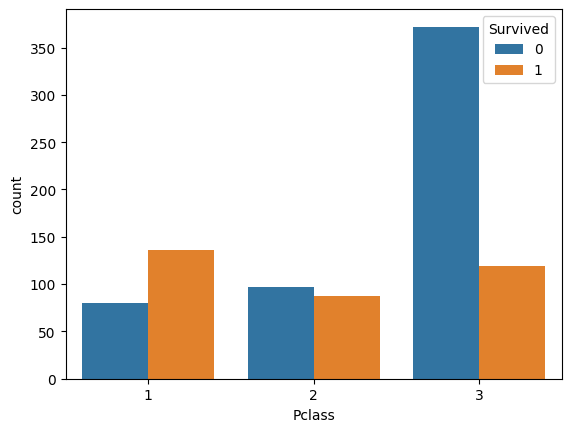

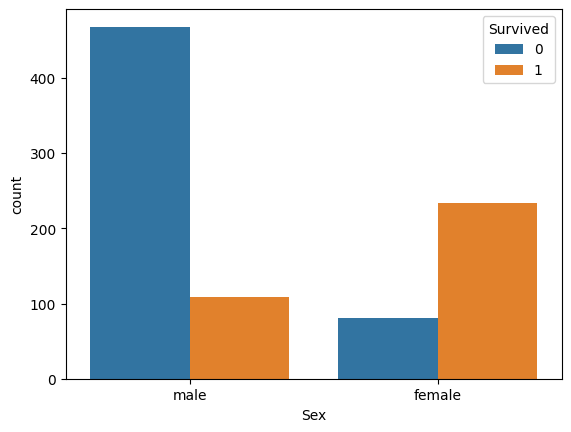

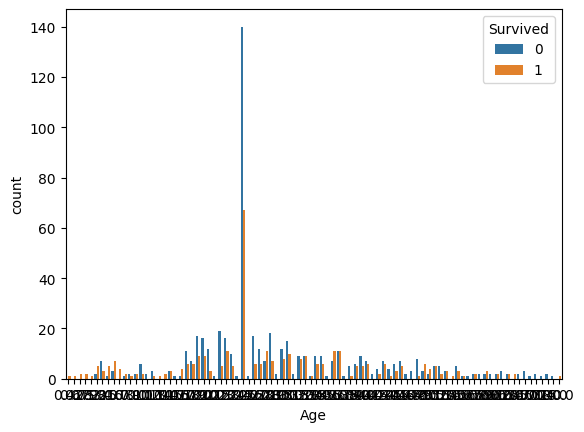

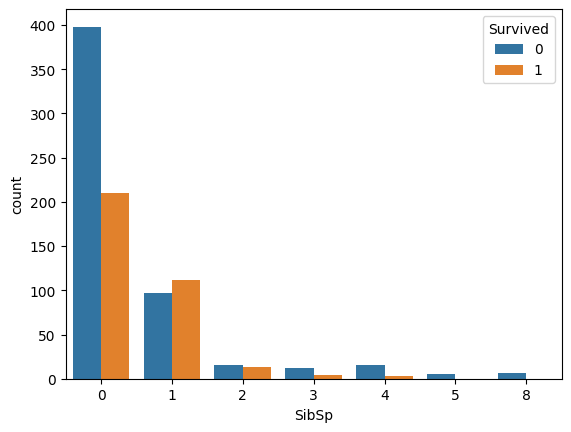

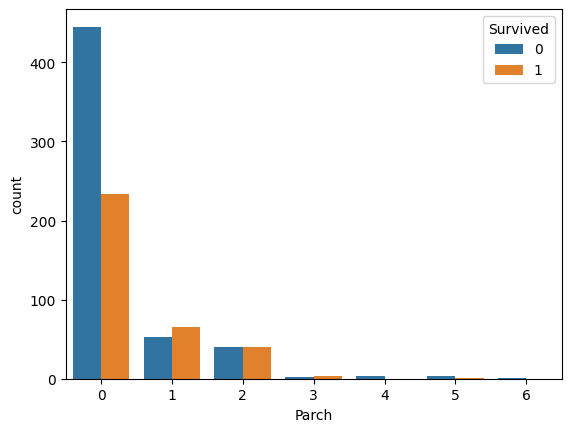

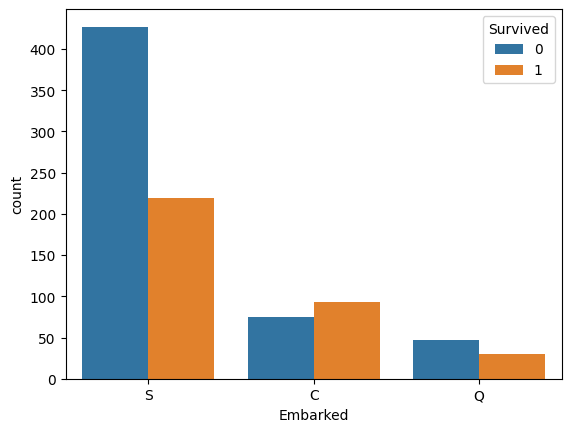

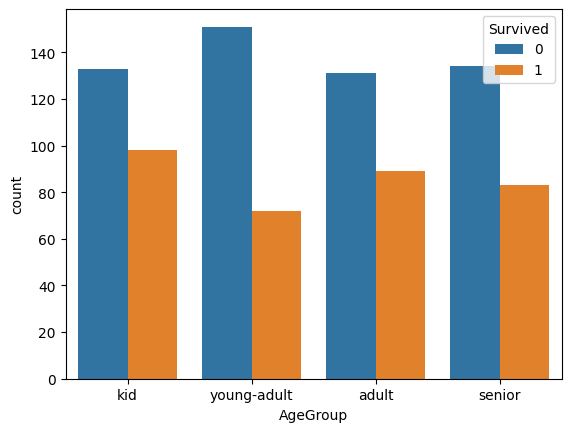

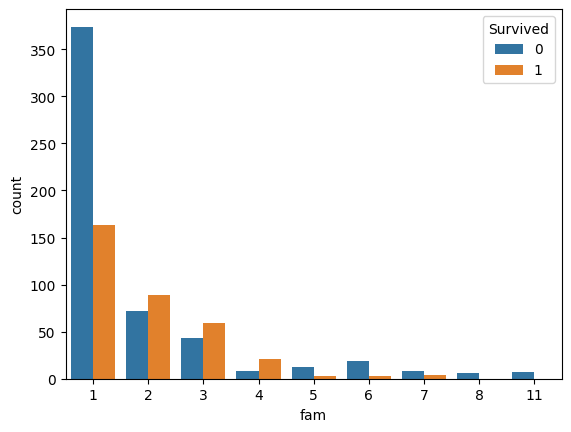

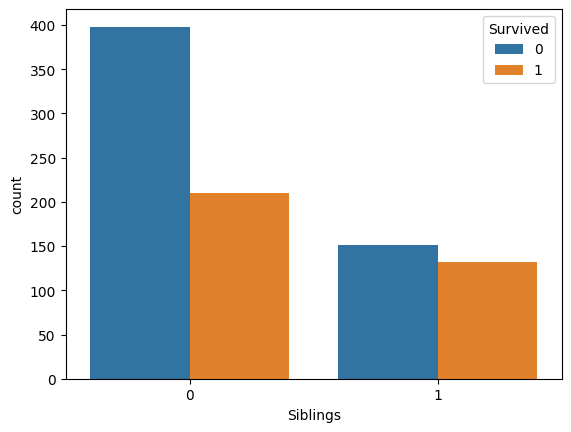

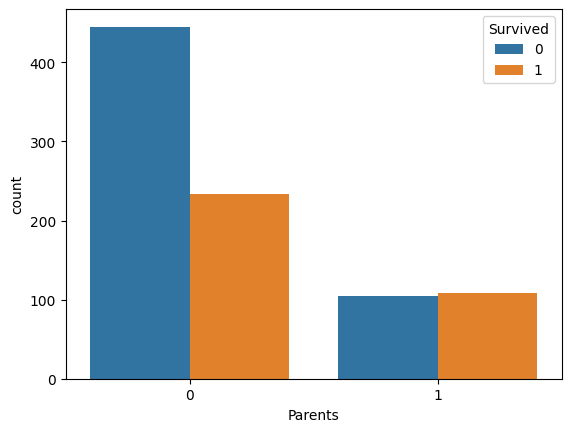

In [117]:
# Visualize distribution of predictors vs Survived
for i, predictor in enumerate(basen.drop(columns=['Survived', 'PassengerId', "Ticket", 'Fare'])):
    plt.figure()
    sns.countplot(data=basen, x=predictor, hue='Survived')

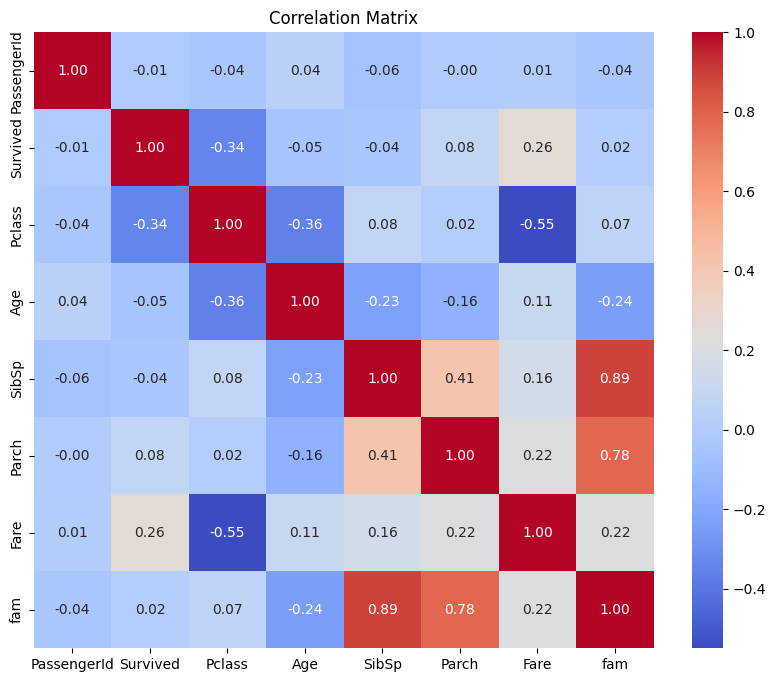

In [118]:
# Correlation matrix
numerical_cols = ['Pclass', 'Siblings', 'Parents', 'Fare']
basen[numerical_cols + ['Survived']].corr()
correlation_matrix = basen.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [119]:
# Preparing data for ML models
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score


In [120]:
# Copy and drop unneeded columns
copy = basen.copy()
copy.drop(['Survived', 'Ticket', 'Age', 'Parch', 'SibSp'], axis=1, inplace=True)

In [121]:
# View fare stats
print(copy['Fare'].agg(['mean', 'median']))
c = copy['Fare'].mode()[0]
(copy['Fare'] == c).sum()

mean      32.204208
median    14.454200
Name: Fare, dtype: float64


43

In [122]:
# Bin Fare column using quartiles
q1 = copy['Fare'].quantile(0.25)
q2 = copy['Fare'].quantile(0.50)
q3 = copy['Fare'].quantile(0.75)
bins = [copy['Fare'].min()-1, q1, q2, q3, copy['Fare'].max()+1]
labels = ['bohot kam', 'kam', 'zyada', 'bahot zyada']
copy['Faregroup'] = pd.cut(copy['Fare'], bins=bins, labels=labels)

# One-hot encode and drop 'Fare'
copy_d = pd.get_dummies(copy)
copy_d.drop('Fare', axis=1, inplace=True)

In [123]:
# Define features and target
X = copy_d
y = basen['Survived']

In [124]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
# Train and evaluate KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))

KNN Accuracy: 0.5977653631284916


In [126]:
# Train and evaluate Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Random Forest Accuracy: 0.7821229050279329


In [127]:
# Train and evaluate Logistic Regression
clf = LogisticRegression(random_state=0, max_iter=10000)
clf.fit(X_train, y_train)
abc = clf.predict(X_test)
print("accuracy: ", accuracy_score(y_test, abc))

accuracy:  0.8156424581005587


K-Nearest Neighbors


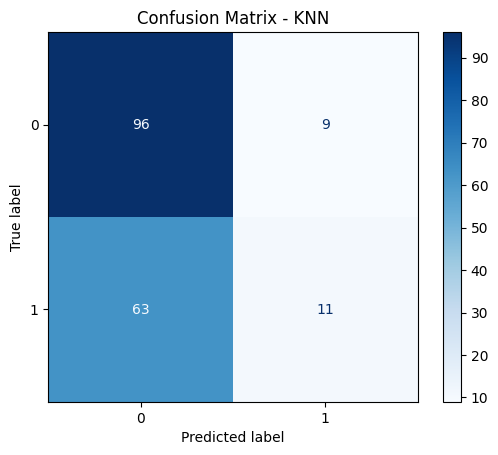

              precision    recall  f1-score   support

           0       0.60      0.91      0.73       105
           1       0.55      0.15      0.23        74

    accuracy                           0.60       179
   macro avg       0.58      0.53      0.48       179
weighted avg       0.58      0.60      0.52       179

Random Forest


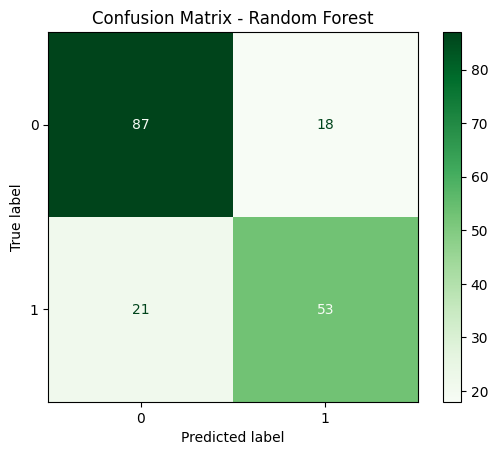

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.72      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

Logistic Regression


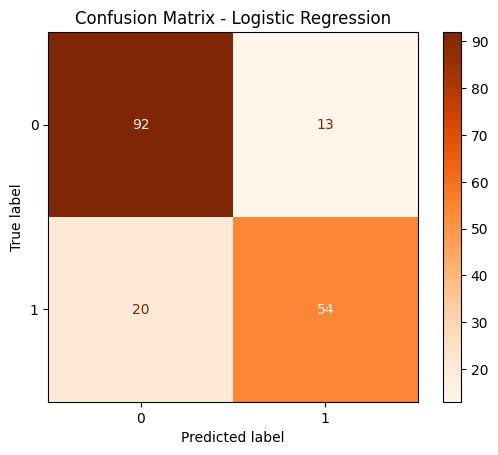

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [128]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# === KNN ===
print("K-Nearest Neighbors")
cm_knn = confusion_matrix(y_test, knn_pred)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
disp_knn.plot(cmap='Blues')
plt.title("Confusion Matrix - KNN")
plt.show()
print(classification_report(y_test, knn_pred))

# === Random Forest ===
print("Random Forest")
cm_rf = confusion_matrix(y_test, rf_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.classes_)
disp_rf.plot(cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.show()
print(classification_report(y_test, rf_pred))

# === Logistic Regression ===
print("Logistic Regression")
cm_lr = confusion_matrix(y_test, abc)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=clf.classes_)
disp_lr.plot(cmap='Oranges')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
print(classification_report(y_test, abc))